In [31]:
# Our numerical workhorse
import numpy as np
import scipy.special
import pandas as pd

# Import pyplot for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Seaborn, useful for graphics
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

In [32]:
# load the data
df = pd.read_csv('data/130315_1_minute_intervals.csv',delimiter=',')
#take a look at the data
df.head()

,fish,genotype,day,light,CLOCK,zeit,activity,window
0,FISH1,het,0,True,9.519,9.519,0.6,NaN
1,FISH1,het,0,True,9.536,9.536,1.9,NaN
2,FISH1,het,0,True,9.553,9.553,1.9,NaN
3,FISH1,het,0,True,9.569,9.569,13.4,NaN
4,FISH1,het,0,True,9.586,9.586,15.4,NaN


## Fraction of fish awake (Rusty)

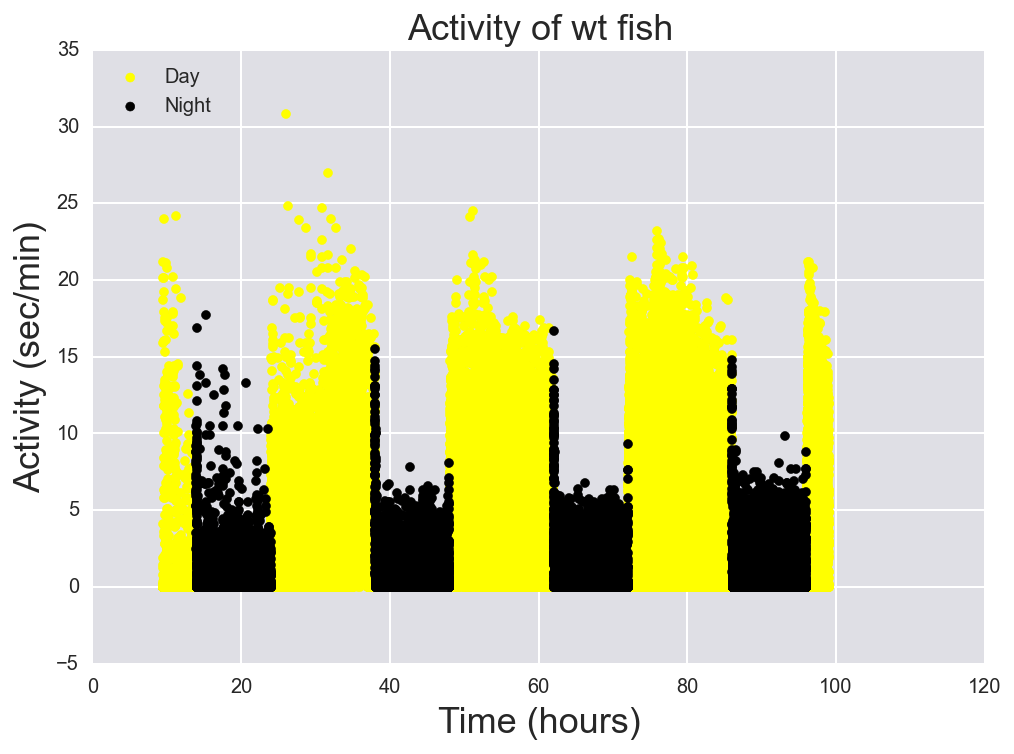

In [33]:
# Isolate activity data from all wild-type fish
wt = (df['genotype'] == 'wt')
wt_df = pd.DataFrame({'activity': df[wt]['activity'], 'zeit': df[wt]['zeit'], 'light': df[wt]['light']})

light_inds = wt_df['light']
dark_inds = ~light_inds
plt.scatter(wt_df[light_inds]['zeit'],wt_df[light_inds]['activity'], color = 'yellow')
plt.scatter(wt_df[dark_inds]['zeit'],wt_df[dark_inds]['activity'], color = 'black')

plt.xlabel('Time (hours)')
plt.ylabel('Activity (sec/min)')
plt.title('Activity of wt fish')
plt.legend(['Day','Night'],loc=2)

## Conclusions from wt
It appears that wild-type fish, for which we expect to see a distinct sleep behavior, are more active in the day than at night.  However, wild-type are still active at some points of the night (especially the beginning of the night) and are also inactive during the day.  
Therefore, both day and night distributions are sums of "sleep" and "awake" behavioral distributions
If we can figue out these distributions, we can define "sleep" and "awake"

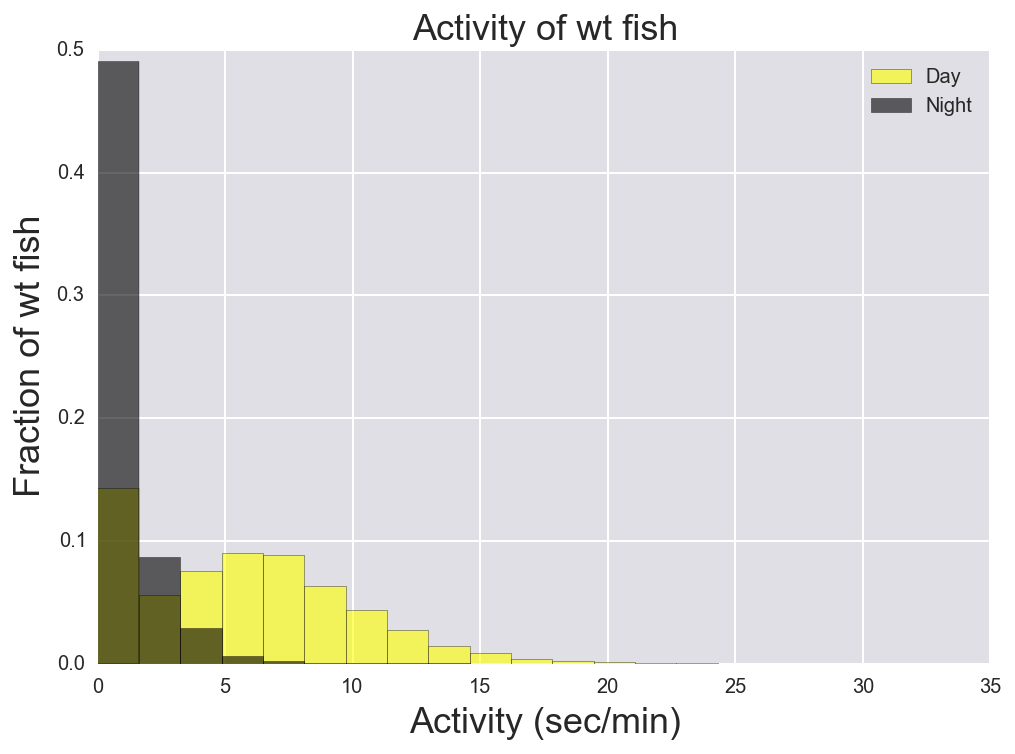

In [34]:
#Let's look at the activity distributions between day and night more closely

bin_edges = np.linspace(min(wt_df['activity']), max(wt_df['activity']), 20)
plt.hist(wt_df[light_inds]['activity'].tolist(), normed = True, alpha = 0.6, bins = bin_edges, color = 'yellow')
plt.hist(wt_df[dark_inds]['activity'].tolist(), normed = True, alpha = 0.6, bins = bin_edges, color = 'black')

plt.xlabel('Activity (sec/min)')
plt.ylabel('Fraction of wt fish')
plt.title('Activity of wt fish')
plt.legend(['Day','Night'],loc=1)


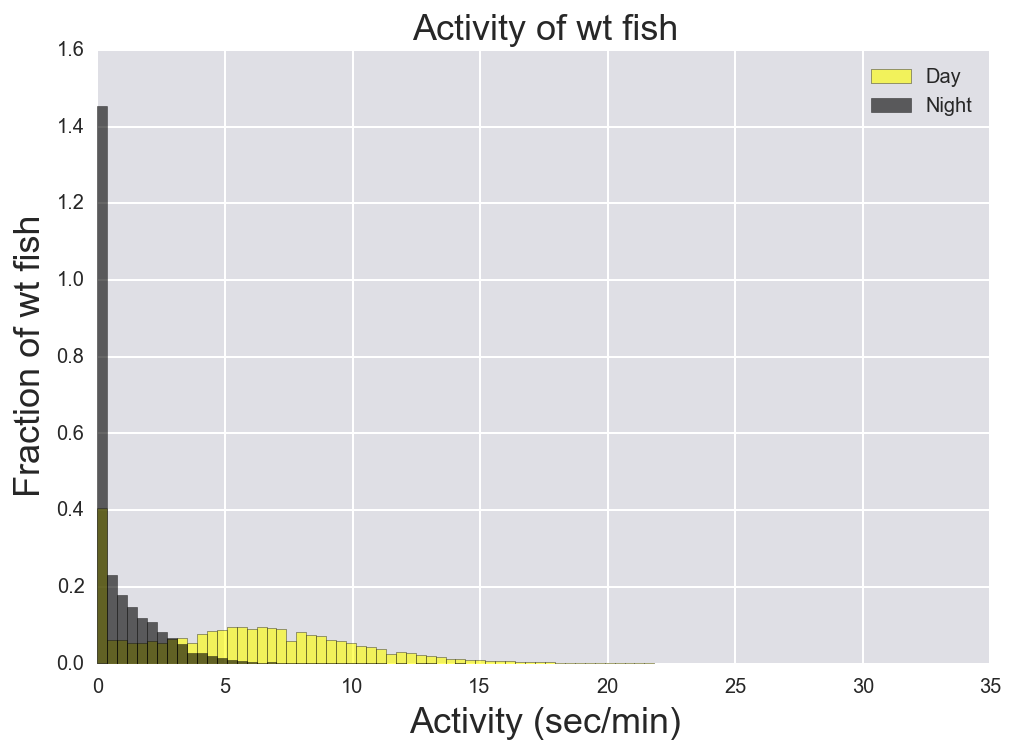

In [35]:
# The 'day' histogram clearly contains significant populations of awake and asleep
#where is the boundary?
bin_edges = np.linspace(min(wt_df['activity']), max(wt_df['activity']), 80)
plt.hist(wt_df[light_inds]['activity'].tolist(), normed = True, alpha = 0.6, bins = bin_edges, color = 'yellow')
plt.hist(wt_df[dark_inds]['activity'].tolist(), normed = True, alpha = 0.6, bins = bin_edges, color = 'black')

plt.xlabel('Activity (sec/min)')
plt.ylabel('Fraction of wt fish')
plt.title('Activity of wt fish')
plt.legend(['Day','Night'],loc=1)

In [36]:
# The activity cutoff appears to be about 3
wt_day = wt_df[light_inds]['activity']
wt_night = wt_df[dark_inds]['activity']
wt_awakefrac_3 = np.sum(wt_day > 3) / np.sum(wt_day > -1)
wt_awakefrac_3 = np.array([wt_awakefrac_3, np.sum(wt_night > 3) / np.sum(wt_night > -1)], dtype=np.float)
wt_awakefrac_3

array([ 0.69053622,  0.07465686])

## Wild type thesholding
69% of the daytime, the wild-type fish are awake.
7.5% of the nighttime, the wild-type fish are awake.

In [37]:
# Isolate wing data from all het fish

het = (df['genotype'] == 'het')
het_df = pd.DataFrame({'activity': df[het]['activity'], 'zeit': df[het]['zeit'], 'light': df[het]['light']})

light_inds = het_df['light']
dark_inds = ~light_inds

het_day = het_df[light_inds]['activity']
het_night = het_df[dark_inds]['activity']
het_awakefrac_3 = np.sum(het_day > 3) / np.sum(het_day > -1)
het_awakefrac_3 = np.array([het_awakefrac_3, np.sum(het_night > 3) / np.sum(het_night > -1)], dtype=np.float)
het_awakefrac_3




array([ 0.63347958,  0.08133578])

In [38]:
het_to_wt = het_awakefrac_3/wt_awakefrac_3
het_to_wt

array([ 0.91737343,  1.08946159])

## Hets vs WT
Hets are awake 92% of the time that wt are awake during the day, but they are awake 109% of the time wt is awake during the night.

In [39]:
# Isolate activity data from all mut fish

mut = (df['genotype'] == 'mut')
mut_df = pd.DataFrame({'activity': df[mut]['activity'], 'zeit': df[mut]['zeit'], 'light': df[mut]['light']})

light_inds = mut_df['light']
dark_inds = ~light_inds

mut_day = mut_df[light_inds]['activity']
mut_night = mut_df[dark_inds]['activity']
mut_awakefrac_3 = np.sum(mut_day > 3) / np.sum(het_day > -1)
mut_awakefrac_3 = np.array([mut_awakefrac_3, np.sum(mut_night > 3) / np.sum(mut_night > -1)], dtype=np.float)
mut_awakefrac_3


array([ 0.3938675,  0.2317803])

In [40]:
mut_to_wt = mut_awakefrac_3/wt_awakefrac_3
mut_to_wt

array([ 0.57037921,  3.10460813])

# Mut vs WT
During the day, double mutants are awake only 57% of the time that wt are awake.
During the night, double mutants are awake 310% of the time wt are awake.  

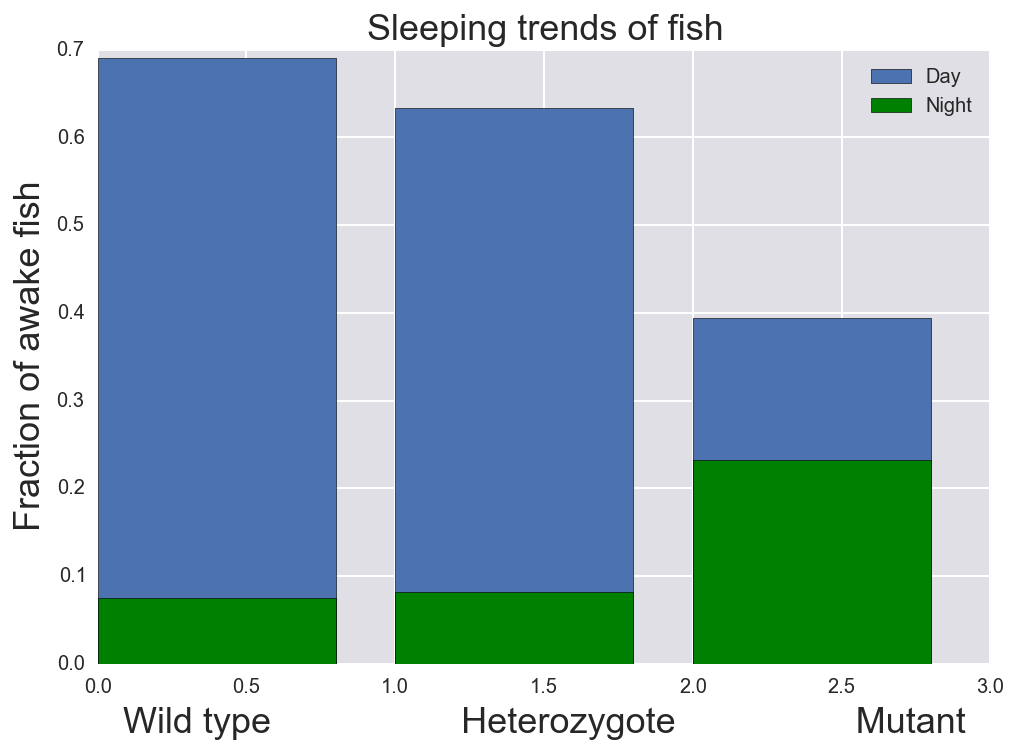

In [41]:
dayfrac = [wt_awakefrac_3[0], het_awakefrac_3[0], mut_awakefrac_3[0]]
nightfrac = [wt_awakefrac_3[1], het_awakefrac_3[1], mut_awakefrac_3[1]]
plt.bar(range(len(dayfrac)), dayfrac)
plt.bar(range(len(nightfrac)), nightfrac, color = 'green')

plt.xlabel('Wild type                   Heterozygote                  Mutant')
plt.ylabel('Fraction of awake fish')
plt.title('Sleeping trends of fish')
plt.legend(['Day','Night'],loc=1)

## How quickly do fish fall asleep / wake up? (Chigozie)
One measure for how "sleepy" fish are is how quickly they reduce their activity levels when falling asleep and how quickly they regain waking activity levels when waking up.
How might we parameterize this? What questions do we need to answer before we can specify exactly the question we are answering mathematically?

1. Are we assuming that the fish start to fall asleep as soon as the lights turn off? Perhaps their activity starts to reduce before the end of the night time, or lags a bit before starting to reduce?
2. How do we actually measure rate of reduction in activity?
    * Rates suggest derivatives. Could we take a derivative of the change in activity at the beginning of the night?
    * Length of first bout of sleep? We don't actually know that the length of the bouts changes over the course of the night, maybe this is something to check. Rusty has defined the threshold for "awake" versus "asleep", so we might be able to use that.
    
To start to answer some of these questions, let's look at the master plot from the tutorial again to get an idea about what's going on:

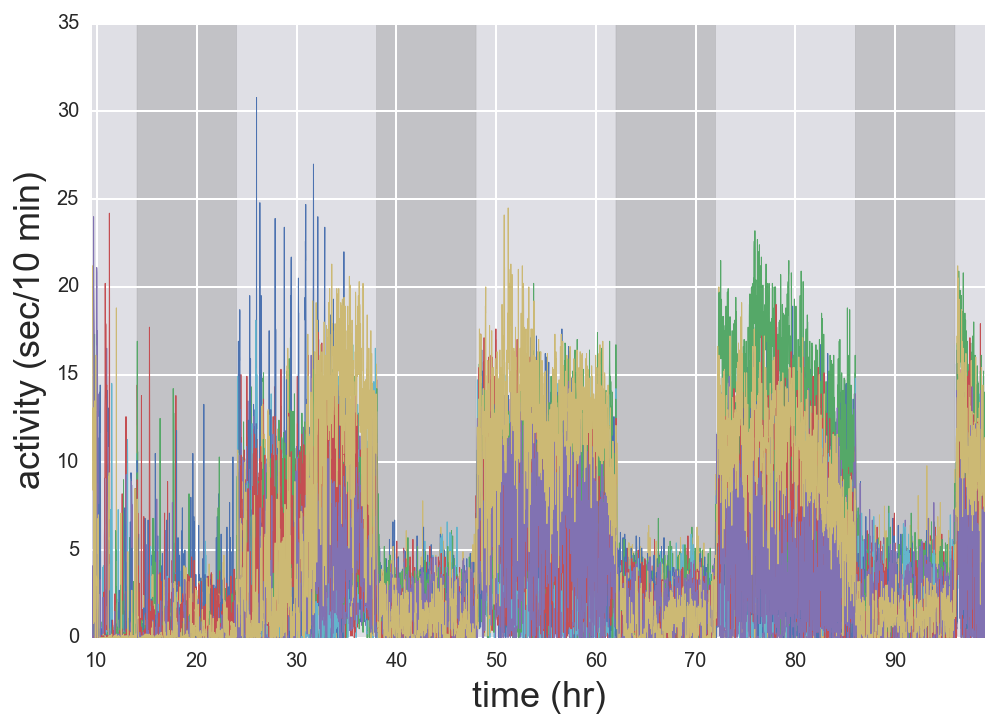

In [12]:
def pretty_activity_plot(ax, selector, selection, col, df, xlabel='time (hr)', 
                         ylabel='activity (sec / min)', lw=0.25, 
                         color=None):
    """
    Makes a pretty plot of sleep traces.  Generates the plot on axes ax,
    and then returns the updated ax.
    """
    # Make sure selection input is iterable
    if type(selection) in [str, int, float]:
        selection = [selection]
        
    # Plot time traces of column col for each fish
    for sel in selection:
        # Pull out record of interest
        df_plot = df[df[selector]==sel]

        # Generate plot
        if color is None:
            ax.plot(df_plot.zeit, df_plot[col], '-', lw=lw)
        else:
            ax.plot(df_plot.zeit, df_plot[col], '-', lw=lw, color=color)

    # Label axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Set axis limits
    ax.set_xlim((df_plot.zeit.min(), df_plot.zeit.max()))
    ax.set_ylim((0.0, ax.get_ylim()[1]))
    
    # Overlay night shading
    ax.fill_between(df_plot.zeit, 0.0, ax.get_ylim()[1], 
                    where=~df_plot.light, color='gray', alpha=0.3, zorder=0)    
    
    return ax

# To plot all the wild type fish, we pass all columns except zeit as y var.
fishes = df.fish[df.genotype=='wt'].unique()
fig, ax = plt.subplots()
ax = pretty_activity_plot(ax, 'fish', fishes, 'activity', df, lw=0.5, 
                          ylabel='activity (sec/10 min)')

This is too zoomed out to be able to tell anything about the beginning of the day/night! Let's zoom in on the beginning of day 3:

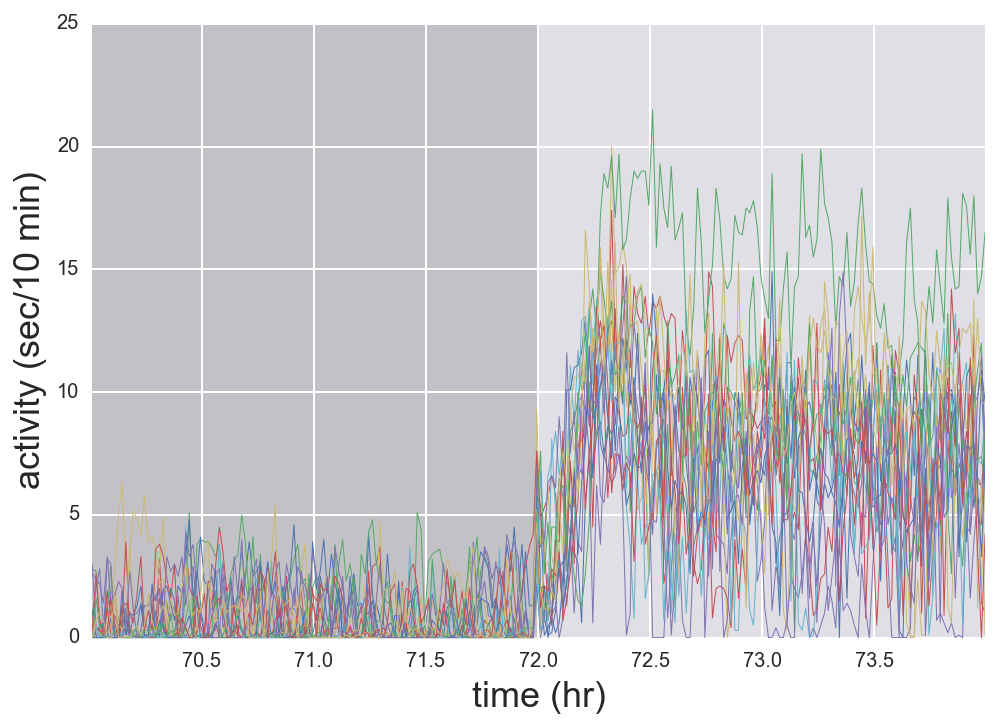

In [13]:
#Slice out early hours of day 3
df_morning = df[((df.day==2) & (df.CLOCK > 22)) | ((df.day==3) & (df.CLOCK < 2))]
fishes = df_morning.fish[df_morning.genotype=='wt'].unique()
fig, ax = plt.subplots()
ax = pretty_activity_plot(ax, 'fish', fishes, 'activity', df_morning, lw=0.5, 
                          ylabel='activity (sec/10 min)')

Ah! This is promising. Now we can clearly see that the activities of each fish rises during the 30 minutes or so after the lights turn out. Maybe we could smooth the curve out a bit and then find the derivative, then this would tell us how quickly each fish wakes up. Let's try bed time:

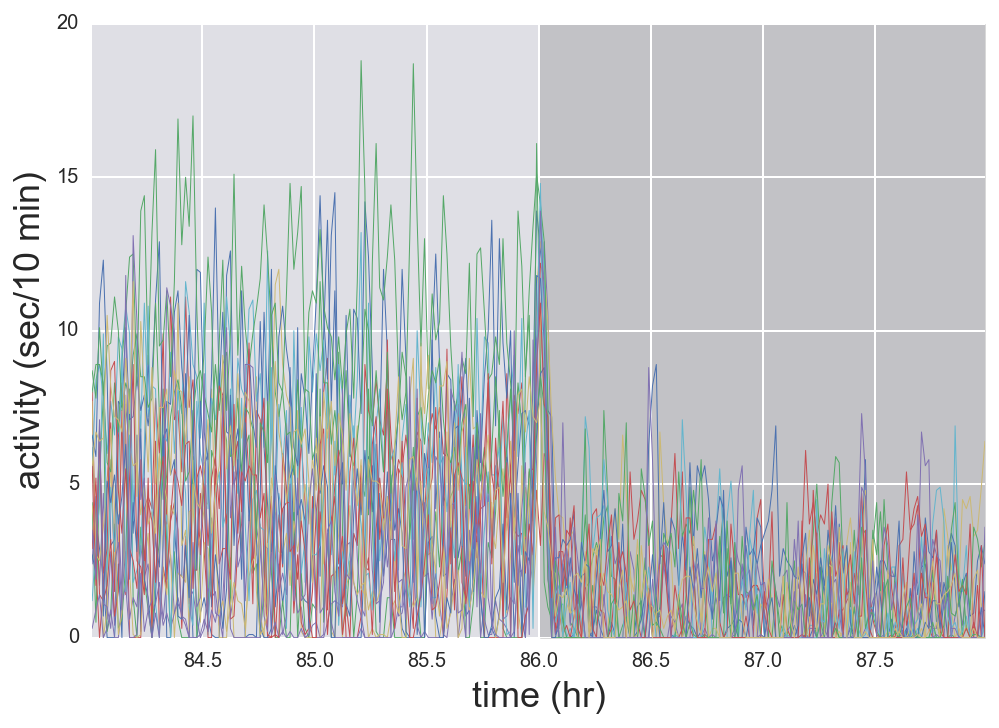

In [14]:
# Slice out early hours of night 3
# We know that the night begins at 14 zeitgeiber time. It would be better to work
# out when the switch occurs from the data, but this way is easy (plus, the light column in
# the dataframe was hardcoded to be the first 14 hours of the day anyway, so we are not losing
# any information.)
df_night = df[((df.day==3) & (df.CLOCK>(12)) & (df.CLOCK<(16)))]
fishes = df_morning.fish[df_morning.genotype=='wt'].unique()
fig, ax = plt.subplots()
ax = pretty_activity_plot(ax, 'fish', fishes, 'activity', df_night, lw=0.5, 
                          ylabel='activity (sec/10 min)')

Hm, it looks like the fish are much quicker to fall asleep than they are to wake up. Their activity drops sharply and never completely recovers, compared to the gradual increase in activity when the day starts. This would not be very easy to use the curve smoothing and then derivative taking method.
Maybe there's a difference between WT, het and mut fish:

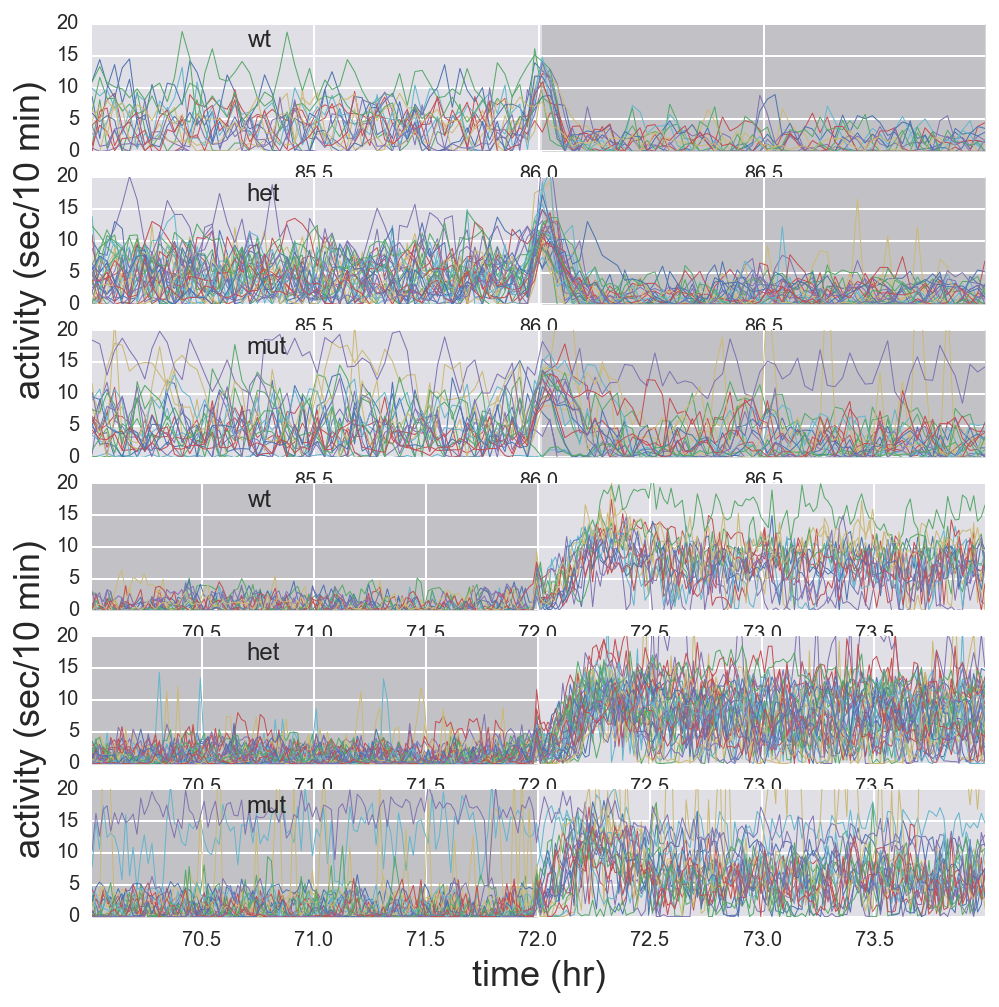

In [15]:
# Zoom in even further
df_night = df[((df.day==3) & (df.CLOCK>(13)) & (df.CLOCK<(15)))]

# Set up subplot axes.  We share the y axis to scale all the same.
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=False, sharey=True, 
                       figsize=(8,8))

# Set ordering of genotypes we want in our plots
gtypes = ['wt', 'het', 'mut']

# Populate each axis with the plots.
for i, gtype in enumerate(gtypes):
    fishes = df.fish[df.genotype==gtype].unique()
    x_label = y_label = ''
    if i == 1:
        y_label = 'activity (sec/10 min)'
    elif i == 2:
        x_label = 'time (hr)'

    ax[i] = pretty_activity_plot(ax[i], 'fish', fishes, 'activity', df_night, 
                                 lw=0.5, ylabel=y_label, xlabel=x_label)

    ax[i].text(0.175, 0.815, gtype, fontsize=12, transform=ax[i].transAxes)
for i, gtype in enumerate(gtypes):
    fishes = df.fish[df.genotype==gtype].unique()
    x_label = y_label = ''
    if i == 1:
        y_label = 'activity (sec/10 min)'
    elif i == 2:
        x_label = 'time (hr)'

    ax[i+3] = pretty_activity_plot(ax[i+3], 'fish', fishes, 'activity', df_morning, 
                                 lw=0.5, ylabel=y_label, xlabel=x_label)

    ax[i+3].text(0.175, 0.815, gtype, fontsize=12, transform=ax[i+3].transAxes)

That actually looks quite promising. We will need to smooth the data out further though, and simply taking a wider rolling average is unlikely to handle it.

However, I have not been able to get sensible results for any smoothing method, possibly because the data is too noisy. See my attempt at smoothing Fish 1's activity on Day 3 below.

In [16]:
import scipy.interpolate

# Based on data smoothing in answer by billyjmc on Nov 5 '13 at 18:26 here: http://stackoverflow.com/questions/15862066/gradient-in-noisy-data-python

# Need to used numpy array as input, which unfortunately destroys the indexing in the dataframe.
time = (df.day==3)
x = np.array(df.zeit[(df.fish=='FISH1') & time])
y = np.array(df.activity[(df.fish=='FISH1') & time])

# indices = np.argsort(x)
# x = x[indices]
# y = y[indices]

interpolated_data = scipy.interpolate.splrep(x, y , k=5, s=1000)
smoothed_data = scipy.interpolate.splev(x, interpolated_data, der=0)
derivative = scipy.interpolate.splev(x, interpolated_data, der=1)


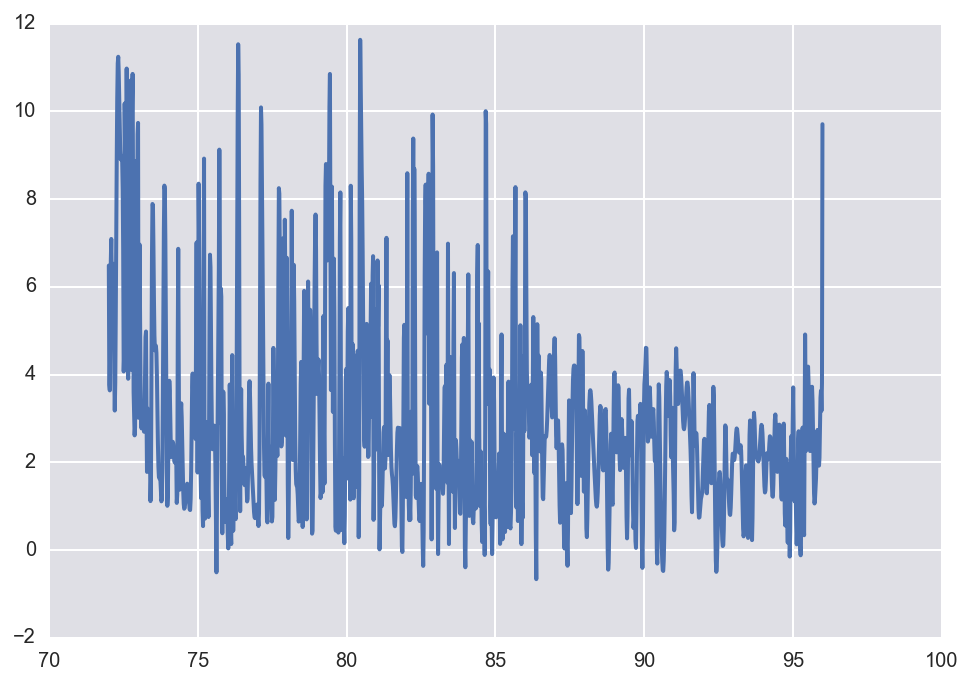

In [17]:
plt.plot(x, smoothed_data)
#plt.plot(x, derivative)

Instead, let's see whether the length of the bouts varies by time of night to work out whether we can use this to define rate of falling asleep.
We can use the bout_lengths function defined in the tutorial:

In [10]:
def bout_lengths(s, wake_threshold=1e-5, rest=True):
    """
    Given activity series s, returns length of rest bouts / length
    of active_bouts if rest is True/False.
    
    First return value is array of rest bout lengths and second return
    value is array of active bout lengths.
    
    The first/last "bouts" are not included because we don't know where
    they begin/end.  The exception is if the fish is always awake or
    asleep.
    """
    # Get Boolean for activeness
    active = (s > wake_threshold)
    
    # Convert to NumPy array if a Pandas Series
    if type(active) is pd.core.series.Series:
        active = active.values
    
    # Check to make sure there is at least one switch
    if np.all(active):
        if rest:
            return np.array([])
        else:
            return np.array([len(s)])
    elif np.all(~active):
        if rest:
            return np.array([len(s)])
        else:
            return np.array([])
 
    # Use the NumPy diff function to find indices where switches states
    # switches[i] is the index of first time point in state it switched to
    switches = np.where(np.diff(active))[0] + 1
    
    # Compute bout lengths from switches, again using np.diff
    bouts = np.diff(switches)
    
    # Find out if active or rest was first and return bout lengths
    # Not most concise way to do it, but most legible
    if active[0]:
        if rest:
            return bouts[::2]
        else:
            return bouts[1::2]
    else:
        if rest:
            return bouts[1::2]
        else:
            return bouts[::2]

# Get indices for third night
inds = (~df.light) & (df.day==2)

# Group the DataFrame
df_gb = df[inds].groupby(('fish', 'genotype'))['activity']

# Compute the rest bout lengths
df_rest_bout = df_gb.apply(bout_lengths, rest=True).reset_index()
df_rest_bout = df_rest_bout.rename(columns={'activity': 'rest_bout_lengths'})

df_rest_bout.head()

,fish,genotype,rest_bout_lengths
0,FISH1,het,"[1, 3, 3, 1, 5, 1, 2, 3, 4, 2, 3, 1, 4, 1, 1, ..."
1,FISH10,het,"[3, 4, 11, 1, 2, 2, 1, 1, 4, 3, 1, 1, 5, 2, 1,..."
2,FISH11,mut,"[1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 7, ..."
3,FISH12,mut,"[1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 4, 1, 1, 1, ..."
4,FISH13,mut,"[15, 4, 1, 3, 7, 3, 1, 1, 2, 5, 3, 2, 2, 1, 2,..."


We want these rest_bout_lengths indexed by the zeit they started at, so we can add them to the dataframe. In fact, let's first add a column to the dataframe telling us whether the fish is active or in a rest bout.

In [19]:
# Use wake_threshold defined by Rusty, above.
wake_threshold = 3
df['active'] = df.activity > wake_threshold
df.head()
active = df.active.values
active
#df['start_bout'] = np.diff(active)

# I couldn't get it to work this way, abandoning.
# def bout_start_times(s=df[df.fish=='FISH1'], wake_threshold=1e-5, rest=True):
#     """
#     Using same logic as bout_times, returns the time of each switch
#     """
#     # Get Boolean for activeness
#     active = (s > wake_threshold)
    
#     # Convert to NumPy array if a Pandas Series
#     if type(active) is pd.core.series.Series:
#         active = active.values
    
#     # Check to make sure there is at least one switch
#     if np.all(active):
#         if rest:
#             return np.array([])
#         else:
#             return np.array([len(s)])
#     elif np.all(~active):
#         if rest:
#             return np.array([len(s)])
#         else:
#             return np.array([])
 
#     # Use the NumPy diff function to find indices where switches states
#     # switches[i] is the index of first time point in state it switched to
#     switches = np.where(np.diff(active))[0] + 1
    
#     for i, switch in enumerate(switches):
#         switch_list[switch] = True
    
#     return switch_list

# bout_start_times(s=df[df.fish=='FISH1'])

array([False, False, False, ...,  True,  True,  True], dtype=bool)

I tried to run through each observation in the dataframe to see whether it is the start of a bout, but enumerate(df.zeit) was too slow.

In [20]:
# # Initialise switch list
# switch_list = [False]
# # Do not try to work out whether item 0 is different from item -1,
# # that will not end well. Instead just define to be False.

# for i, _ in enumerate(df.zeit):
#     if i != 0:
#         switch_list += [df.ix[i].active != df.ix[i-1].active]

# df['switch'] = switch_list

In [6]:
df[(df.fish=='FISH1') & (df.day==3)].head()

,fish,genotype,day,light,CLOCK,zeit,activity,window
3746,FISH1,het,3,True,0.011,72.011,6.6,36.7
3747,FISH1,het,3,True,0.028,72.028,3.2,37.0
3748,FISH1,het,3,True,0.044,72.044,4.6,38.3
3749,FISH1,het,3,True,0.061,72.061,4.3,40.0
3750,FISH1,het,3,True,0.078,72.078,7.2,43.9


## A different look at sleep bout lengths (Kevin)
Let's compare the length of rest bouts during the day and night for each genotype
First, we need an array or list of bout lengths for each genotype and day or night

In [99]:
# Get indices for night
night_inds = (~df.light)
# get indices for the third day
day_inds = df.light

# Group the DataFrame
night_df_gb = df[night_inds].groupby(('fish', 'genotype'))['activity']
day_df_gb = df[day_inds].groupby(('fish','genotype',))['activity']

# Compute the rest bout lengths
day_rest_bout = day_df_gb.apply(bout_lengths, rest=True).reset_index()
day_rest_bout = day_rest_bout.rename(columns={'activity': 'rest_bout_lengths'})
night_rest_bout = night_df_gb.apply(bout_lengths, rest=True).reset_index()
night_rest_bout = night_rest_bout.rename(columns={'activity': 'rest_bout_lengths'})

het_day = np.array([])
for lengths in day_rest_bout[day_rest_bout['genotype']=='het']['rest_bout_lengths']:
    het_day = np.append(het_day,lengths)
wt_day = np.array([])
for lengths in day_rest_bout[day_rest_bout['genotype']=='wt']['rest_bout_lengths']:
    wt_day = np.append(wt_day,lengths)
mut_day = np.array([])
for lengths in day_rest_bout[day_rest_bout['genotype']=='mut']['rest_bout_lengths']:
    mut_day = np.append(mut_day,lengths)
    
het_night = np.array([])
for lengths in night_rest_bout[day_rest_bout['genotype']=='het']['rest_bout_lengths']:
    het_night = np.append(het_night,lengths)
wt_night = np.array([])
for lengths in night_rest_bout[night_rest_bout['genotype']=='wt']['rest_bout_lengths']:
    wt_night = np.append(wt_night,lengths)
mut_night = np.array([])
for lengths in night_rest_bout[night_rest_bout['genotype']=='mut']['rest_bout_lengths']:
    mut_night = np.append(mut_night,lengths)

Next, let's assume rest bout lengths are geometrically distributed and independent so that their likelihood is $logP(D|p,I)=\sum \{(d_i-1)log(1-p)+ log(p)\}$, where $d_i$ are the bout lengths. For simplicity, let's assume a uniform prior on the parameter p, which represents the probability that the rest bout will end each minute. 

In [80]:
def log_prior(p):
    """
    Log of the uniform prior for p
    """
    if p < 0.0 or p > 1.0:
        return -np.inf
    else:
        return 0


def log_likelihood(data, p):
    """
    Log of the unnormalized likelihood for a single p 
    for geometrically distributed data.
    """
    return sum([(d-1)*np.log(1-p)+np.log(p) for d in data])


def log_posterior(log_likelihood_fun, log_prior_fun, data, P):
    """
    Compute the log of the posterior, given an array of data plus an
    array of p.  The functions defining the likelihood
    and prior are given by log_likelihood_fun and log_prior_fun, 
    respectively.
    
    Returns a 1D array of the posterior where entry i corresponds to
    P[i].
    """
    log_post = np.empty(len(P))
    for i,p in enumerate(P):
        log_post[i] = log_likelihood_fun(data,p) + log_prior_fun(p)

    # Add a constant to log_post to get it close to unity so well-behaved
    # when we exponentiate it.  We don't care about normalization.
    log_post -= log_post.max()

    return log_post

In [88]:
# Range to sample parameters
P = np.linspace(0.01, .99, 200)

# Compute the posteriors
mut_day_log_post = log_posterior(log_likelihood, log_prior, mut_day,P)
het_day_log_post = log_posterior(log_likelihood, log_prior, het_day,P)
wt_day_log_post = log_posterior(log_likelihood, log_prior, wt_day,P)
mut_night_log_post = log_posterior(log_likelihood, log_prior, mut_night,P)
het_night_log_post = log_posterior(log_likelihood, log_prior, het_night,P)
wt_night_log_post = log_posterior(log_likelihood, log_prior, wt_night,P)

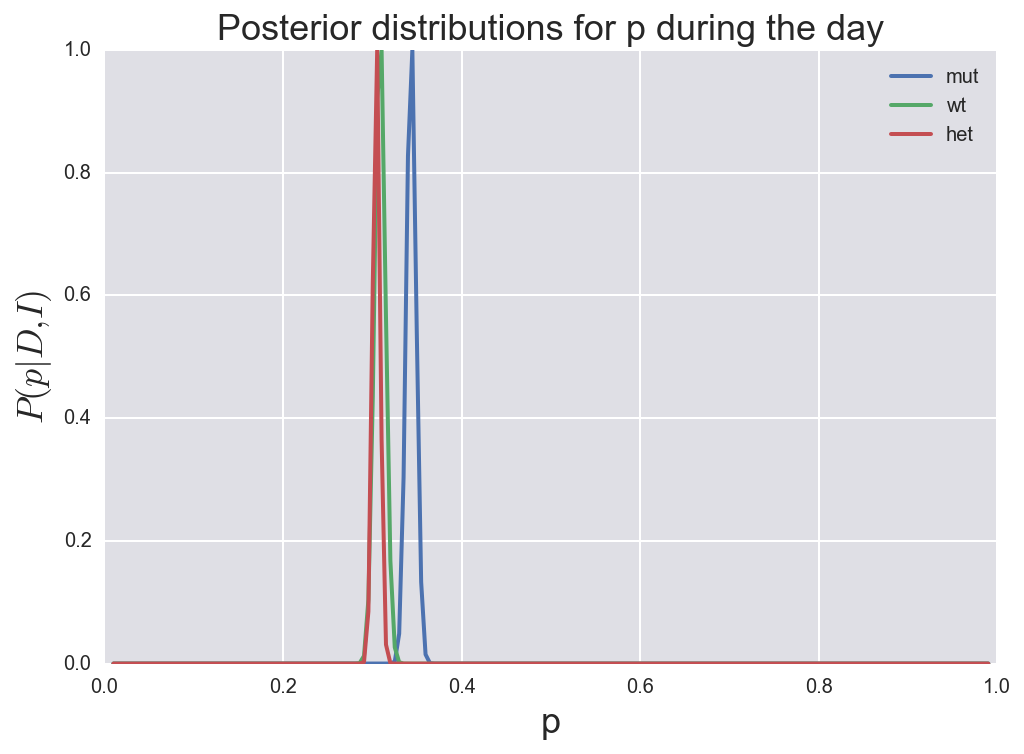

In [84]:
# let's plot the ones during the day
plt.plot(P,np.exp(mut_day_log_post))
plt.plot(P,np.exp(wt_day_log_post))
plt.plot(P,np.exp(het_day_log_post))
plt.xlim([0,1])
plt.xlabel('p')
plt.ylabel(r'$P(p|D,I)$')
plt.title('Posterior distributions for p during the day')
plt.legend(['mut','wt','het'])

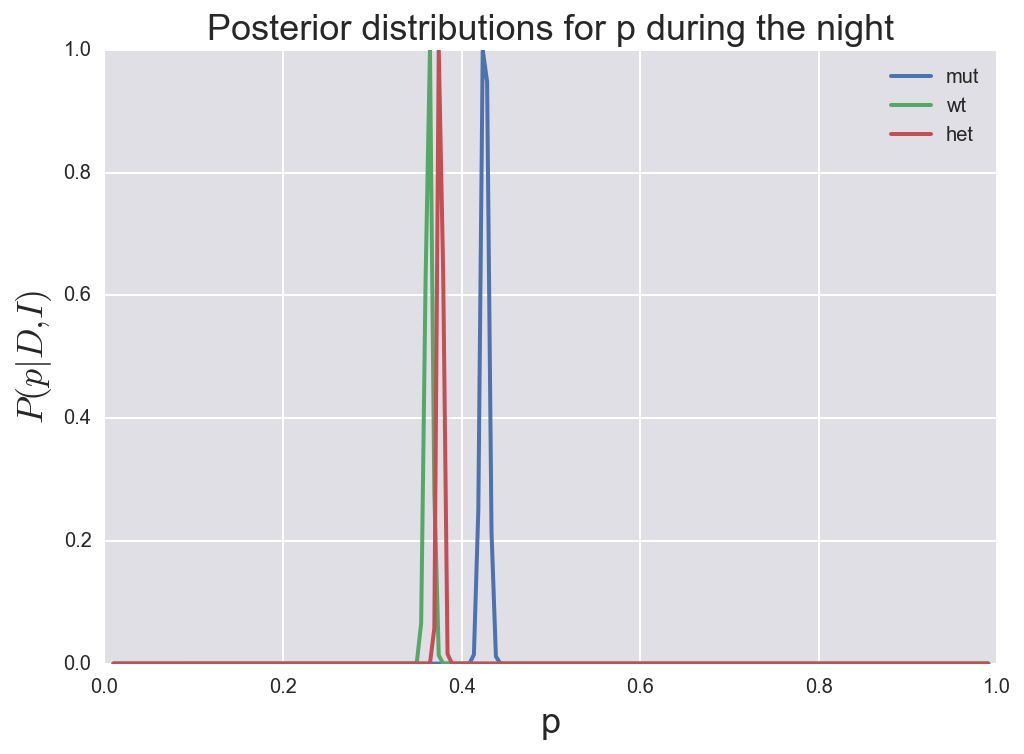

In [85]:
# let's plot the ones during the night
plt.plot(P,np.exp(mut_night_log_post))
plt.plot(P,np.exp(wt_night_log_post))
plt.plot(P,np.exp(het_night_log_post))
plt.xlim([0,1])
plt.xlabel('p')
plt.ylabel(r'$P(p|D,I)$')
plt.title('Posterior distributions for p during the night')
plt.legend(['mut','wt','het'])

These posterior distributions show that all genotypes are more likely to interrupt rest bouts during the night than at dat. They also show that during the day and the night, the mutant fish were the most likely to interrupt their rest bouts. During the day, the wild-type fish were slightly more likely to interrupt rest bouts than heterozygous fish, but this trend flipped at night. The fact that bouts are more likely to be interrupted during the night is a bit unexpected, so let's look at why it might be. Let's examine the data for the wild-type fish 

mean length during the day: 3.24091671325
mean length during the night: 2.7515589104
number of rest bouts during the day: 1789
number of rest bouts during the night: 6094


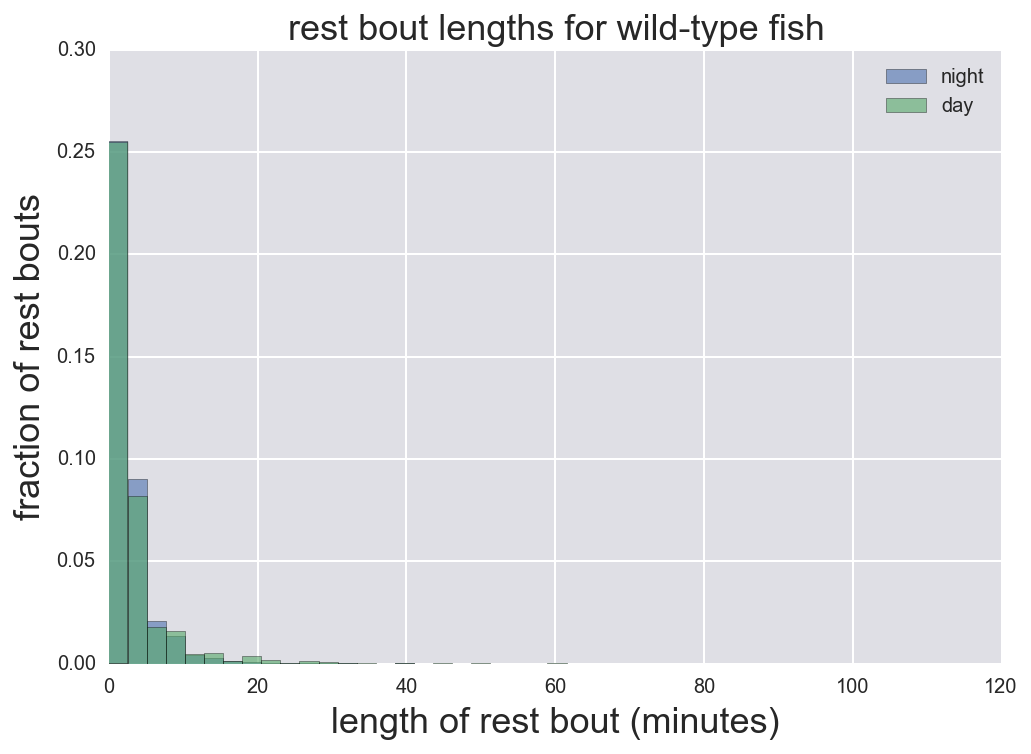

In [117]:
_=plt.hist(wt_night,bins=np.linspace(0,100,40),alpha=0.6,normed=True)
_=plt.hist(wt_day,bins=np.linspace(0,100,40),alpha=0.6,normed=True)
plt.xlabel ('length of rest bout (minutes)')
plt.ylabel ('fraction of rest bouts')
plt.title ('rest bout lengths for wild-type fish')
plt.legend (['night','day'])
print ('mean length during the day:',np.mean(wt_day))
print ('mean length during the night:',np.mean(wt_night))
print ('number of rest bouts during the day:', len(wt_day))
print ('number of rest bouts during the night:', len(wt_night))

So now the results are a bit clearer: rest bouts durin the day are actually slightly less likely to be interrupted each minute (that is, they are slightly longer) than those during the night. However, there are more than 3 times as many rest bouts at night as there are during the day.

## Comparing the parameters (Kevin)

Assigning each fish to be either asleep or awake during each minute is intuitive, and using the minute as the fundamental unit of time is well-supported by the arousal data in the paper. However, this analysis hides the variation between individual fish of the same genotype, and the cutoff of 3 sec/min of activity is somewhat arbitrary.  The analysis does reveal interesting differences in aggregate behavior between the genotypes, but these differences would be more meaningful if accompanied by knowledge of the differences within each genotype. 

The sleep bout interruption analysis also lumped all bouts of each genotype together without regard for which individual fish generated them. It also ignores the differences in number of rest bouts between fish and between genotypes. This weakness is exacerbated by the fact that there are fish with no rest bouts during the day. However, it also does reveal differences between the genotypes, and the posterior distribution was relatively easy to calculate. 